# <center> <span style="color:#f6f794"> 📊 📊 📊 EDA 📊 📊 📊 </span> </center>

**Quick Summary:**

- Columns: 15
- Rows: 1,000
- Unique comments: 1,000
- Unique videos: 13
- Duplicates: 0
- Nulls: 0
- Data Type: ok ('comment_id', 'video_id', 'text' are object, the rest boolean)
____

### <span style="color:#f6f794"> 📚 Importing libraries and setting displays </span>

In [114]:
import pandas as pd
import numpy as np
import requests
import gzip
from io import BytesIO
import os
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import time
import csv
import re
from collections import Counter
import string
from sklearn.feature_extraction.text import CountVectorizer

### <span style="color:#f6f794"> 📂 Opening files and create dataframes of them </span>

In [115]:
# Setting paths
current_dir = os.getcwd()                            # \sentiment-analyzer-inc\eda
print(current_dir)
parent_dir = os.path.dirname(current_dir)            # \sentiment-analyzer-inc
print(parent_dir)
data_dir = os.path.join(current_dir, "data")          # \sentiment-analyzer-inc\eda\data
print(data_dir)
cleaning_file_path = os.path.join(current_dir, "")      # \sentiment-analyzer-inc\eda\data\
print(cleaning_file_path)

c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda\data
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda\


In [116]:
GITHUB_CLEAN_URL = "https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/eda/data/youtube_dataset_cleaned.csv.gz"


def load_airbnb_data_from_github(url):
    """
    Downloading and processing Airbnb data from GitHub repository.
    """
    print("🔗 Downloading data from GitHub...")

    try:
        # Download the compressed CSV file from GitHub
        response = requests.get(url)
        response.raise_for_status()

        print("📊 Processing compressed file..")

        # Decompressing and reading the CSV file
        with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
            df = pd.read_csv(
                f,
                sep=',',                  # Specify the delimiter
                encoding='utf-8',         # Specify the encoding
                quoting=csv.QUOTE_MINIMAL # Specify the quoting behavior
                )

        print(f"✅ Data downloaded succesfully!")
        
        return df

    except requests.exceptions.RequestException as req_err:
        print(f"❌ Network/Request Error while downloading data: {req_err}")
        return None
    except Exception as e:
        print(f"❌ General Error while processing data: {e}")
        return None

# Creating dataframe from GitHub URL
df_clean_1 = load_airbnb_data_from_github(GITHUB_CLEAN_URL)

🔗 Downloading data from GitHub...
📊 Processing compressed file..
✅ Data downloaded succesfully!


#### <span style="color:#f3a006"> Boolean Columns Distribution </span> 

- **Percentage of true vs false**

| Column             | True (%) | False (%) |
|--------------------|----------|-----------|
| is_toxic           | 46.2     | 53.8      |
| is_abusive         | 35.3     | 64.7      |
| is_threat          | 2.1      | 97.9      |
| is_provocative     | 16.1     | 83.9      |
| is_obscene         | 10.0     | 90.0      |
| is_hatespeech      | 13.8     | 86.2      |
| is_racist          | 12.5     | 87.5      |
| is_nationalist     | 0.8      | 99.2      |
| is_sexist          | 0.1      | 99.9      |
| is_homophobic      | 0.0      | 100.0     |
| is_religious_hate  | 1.2      | 98.8      |
| is_radicalism      | 0.0      | 100.0     |

- **Useful for modeling**

| Correlation Level        | Columns                             | Notes                                             |
|--------------------------|-----------------------------------|---------------------------------------------------|
| **High correlation**     | ``is_toxic``, ``is_abusive``               | Strongly related; redundant but useful together  |
| **Moderate correlation** | ``is_provocative``, ``is_toxic`` (0.47)   | Useful signals, complement each other             |
| **Low/No correlation**   | ``is_nationalist``, ``is_sexist``, ``is_homophobic``, ``is_radicalism`` | Very low variance; provide little info, consider dropping or grouping |


In [117]:
# Checking the percentage of true and false boolean's columns

def check_boolean_percentage(df, column_name):
    df[column_name] = df[column_name].astype(bool)
    true_count = df[column_name].sum()
    total_count = df[column_name].count()
    false_count = total_count - true_count
    true_percentage = ((true_count / total_count) * 100).round(2)
    false_percentage = ((false_count / total_count) * 100).round(2)
    print(f"Column '{column_name}': True: {true_percentage}%  VS  False: {false_percentage}%")
 
# Checking boolean columns
check_boolean_percentage(df_clean_1, 'is_toxic')
check_boolean_percentage(df_clean_1, 'is_abusive')
check_boolean_percentage(df_clean_1, 'is_threat')
check_boolean_percentage(df_clean_1, 'is_provocative')
check_boolean_percentage(df_clean_1, 'is_obscene')
check_boolean_percentage(df_clean_1, 'is_hatespeech')
check_boolean_percentage(df_clean_1, 'is_racist')
check_boolean_percentage(df_clean_1, 'is_nationalist')
check_boolean_percentage(df_clean_1, 'is_sexist')
check_boolean_percentage(df_clean_1, 'is_homophobic')
check_boolean_percentage(df_clean_1, 'is_religious_hate')
check_boolean_percentage(df_clean_1, 'is_radicalism')

Column 'is_toxic': True: 46.2%  VS  False: 53.8%
Column 'is_abusive': True: 35.3%  VS  False: 64.7%
Column 'is_threat': True: 2.1%  VS  False: 97.9%
Column 'is_provocative': True: 16.1%  VS  False: 83.9%
Column 'is_obscene': True: 10.0%  VS  False: 90.0%
Column 'is_hatespeech': True: 13.8%  VS  False: 86.2%
Column 'is_racist': True: 12.5%  VS  False: 87.5%
Column 'is_nationalist': True: 0.8%  VS  False: 99.2%
Column 'is_sexist': True: 0.1%  VS  False: 99.9%
Column 'is_homophobic': True: 0.0%  VS  False: 100.0%
Column 'is_religious_hate': True: 1.2%  VS  False: 98.8%
Column 'is_radicalism': True: 0.0%  VS  False: 100.0%


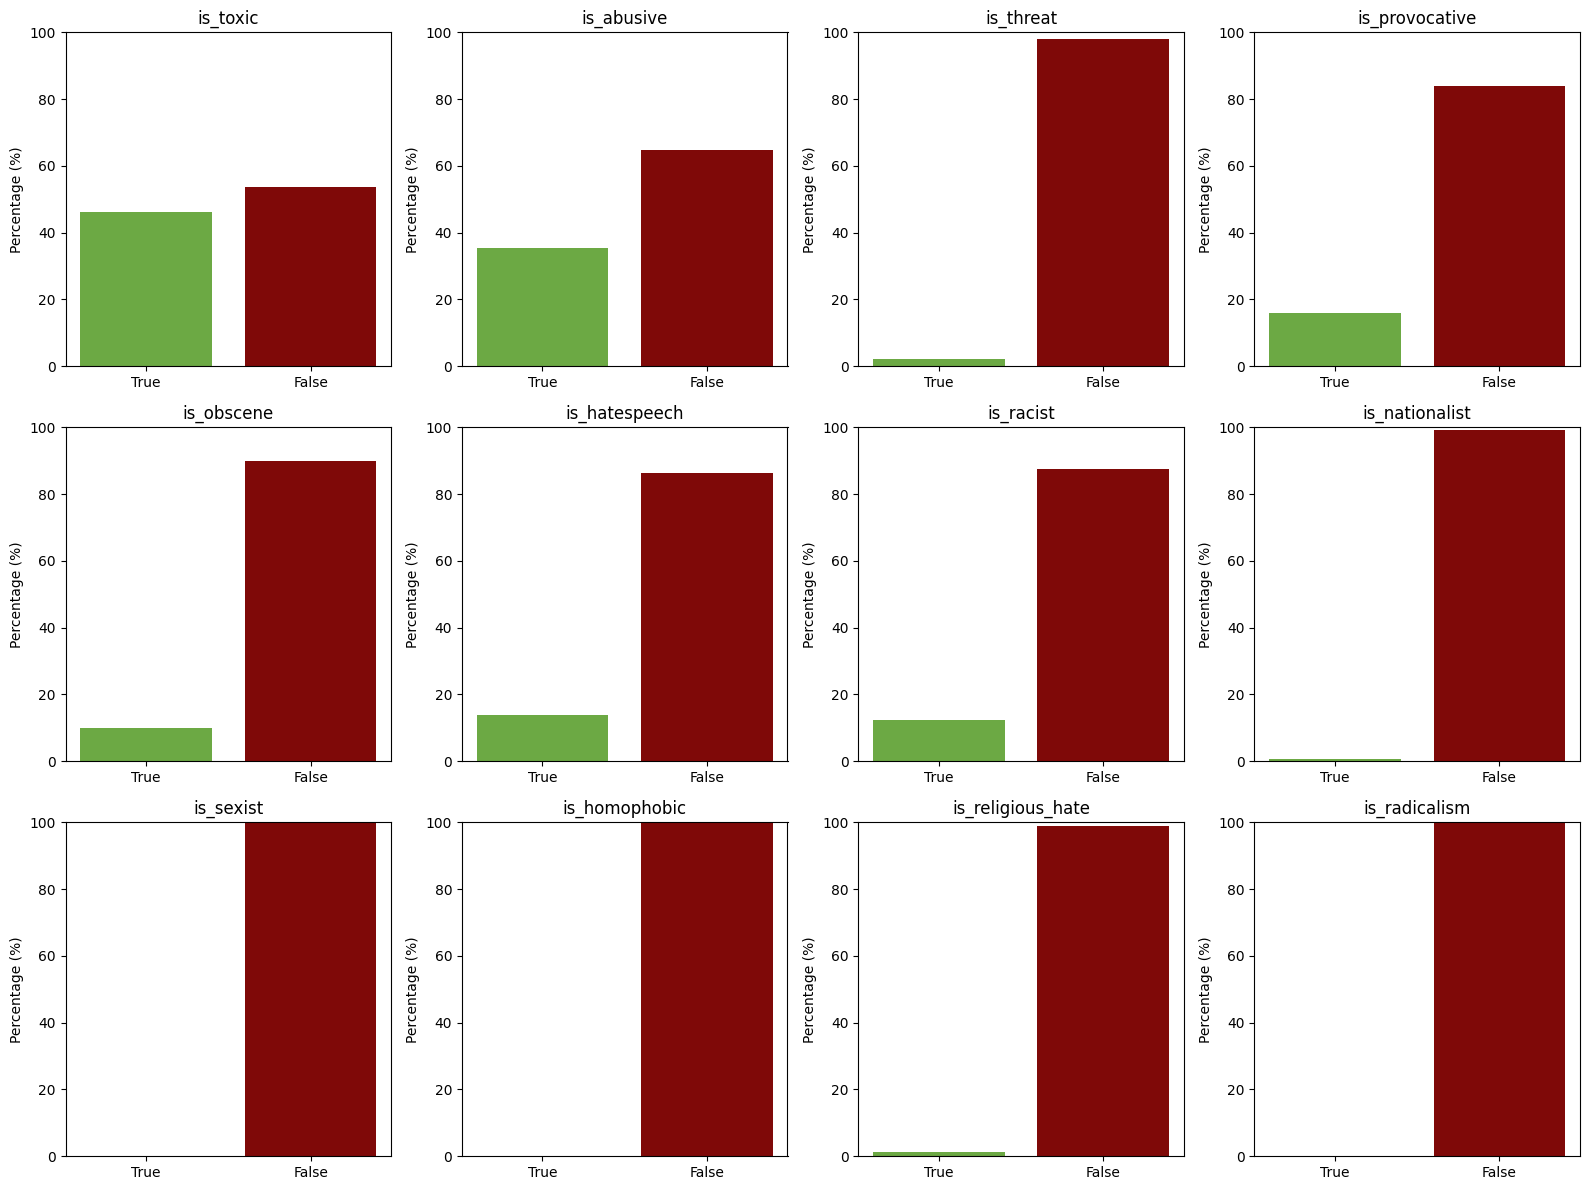

In [118]:
# Graphing the percentage of true and false boolean's columns

def plot_all_booleans_together(df, bool_columns):
    n = len(bool_columns)
    ncols = 4  # 4 columnas por fila, ajusta según preferencia
    nrows = (n + ncols - 1) // ncols  # filas necesarias

    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(bool_columns):
        df[col] = df[col].astype(bool)
        true_count = df[col].sum()
        total_count = df[col].count()
        false_count = total_count - true_count
        true_percentage = (true_count / total_count) * 100
        false_percentage = (false_count / total_count) * 100

        axes[i].bar(['True', 'False'], [true_percentage, false_percentage], color=['#6CA944', '#7F0908'])
        axes[i].set_title(f"{col}")
        axes[i].set_ylim(0, 100)
        axes[i].set_ylabel('Percentage (%)')

    # Ocultar ejes vacíos si los hay
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Lista de columnas booleanas
bool_cols = ['is_toxic', 'is_abusive', 'is_threat', 'is_provocative', 'is_obscene', 'is_hatespeech',
             'is_racist', 'is_nationalist', 'is_sexist', 'is_homophobic', 'is_religious_hate', 'is_radicalism']

plot_all_booleans_together(df_clean_1, bool_cols)

In [119]:
# Calculate pairwise correlations between booleans (to catch redundant features)
def calculate_boolean_correlations(df, bool_columns):
    df_bool = df[bool_columns].astype(bool)
    correlations = df_bool.corr()
    print("Pairwise correlations between boolean columns:")
    print(correlations)
calculate_boolean_correlations(df_clean_1, bool_cols)

Pairwise correlations between boolean columns:
                   is_toxic  is_abusive  is_threat  is_provocative  is_obscene  is_hatespeech  is_racist  is_nationalist  is_sexist  is_homophobic  is_religious_hate  is_radicalism
is_toxic           1.000000    0.797086   0.158048        0.472718    0.359707       0.431774   0.407869        0.096908   0.034142            NaN           0.118928            NaN
is_abusive         0.797086    1.000000   0.198282        0.593057    0.451277      -0.119603  -0.121005       -0.042843   0.042833            NaN          -0.042970            NaN
is_threat          0.158048    0.198282   1.000000        0.106626   -0.048820       0.002063  -0.034268       -0.013152  -0.004634            NaN           0.111962            NaN
is_provocative     0.472718    0.593057   0.106626        1.000000    0.089788      -0.072719  -0.075072       -0.008796  -0.013860            NaN           0.001699            NaN
is_obscene         0.359707    0.451277  -0.0488

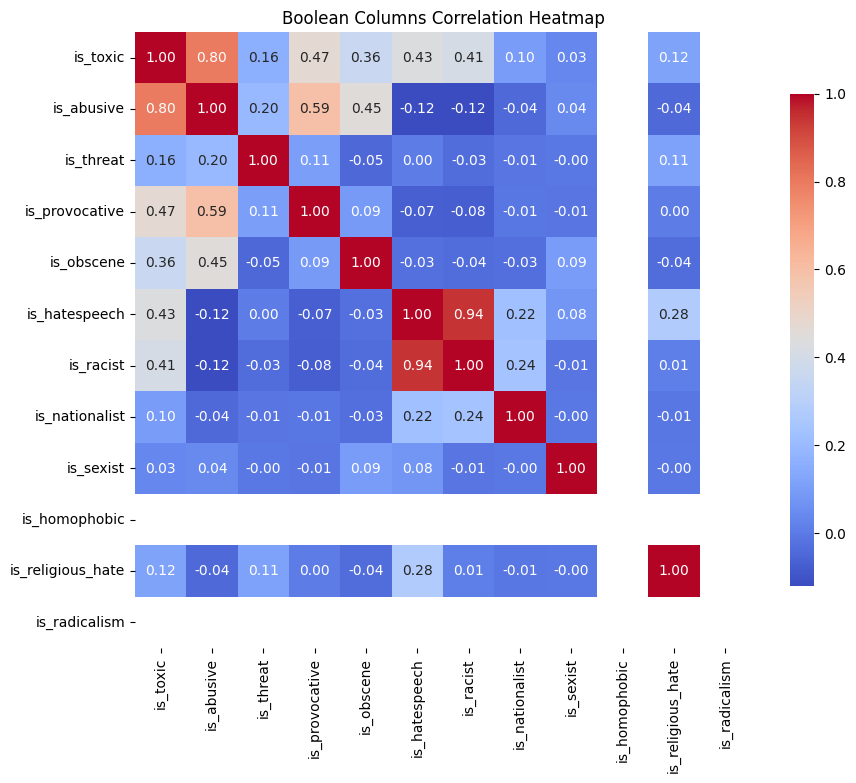

In [120]:
# Heatmap of boolean correlations
def plot_boolean_correlation_heatmap(df, bool_columns):
    df_bool = df[bool_columns].astype(bool)
    correlations = df_bool.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
    plt.title('Boolean Columns Correlation Heatmap')
    plt.show()  
plot_boolean_correlation_heatmap(df_clean_1, bool_cols)

In [121]:
# Flag any boolean columns with extremely low variance for possible removal or special treatment
def flag_low_variance_booleans(df, bool_columns, threshold=0.01):
    low_variance_cols = []
    for col in bool_columns:
        variance = df[col].var()
        if variance < threshold:
            low_variance_cols.append(col)
    if low_variance_cols:
        print(f"Columns with low variance (< {threshold}): {low_variance_cols}")
    else:
        print("No columns with low variance found.")

flag_low_variance_booleans(df_clean_1, bool_cols)

Columns with low variance (< 0.01): ['is_nationalist', 'is_sexist', 'is_homophobic', 'is_radicalism']


#### <span style="color:#f3a006"> [`text`] data exploration </span> 

- has_emoji            14
- has_url              12
- has_special_char    479

<br></br>

- N-gram analysis
    - An n-gram is simply a sequence of n consecutive words: <u>Bigram</u> (n=2): e.g. "not good", "very toxic", <u>Trigram</u> (n=3): e.g. "this is bad", "hate this video"



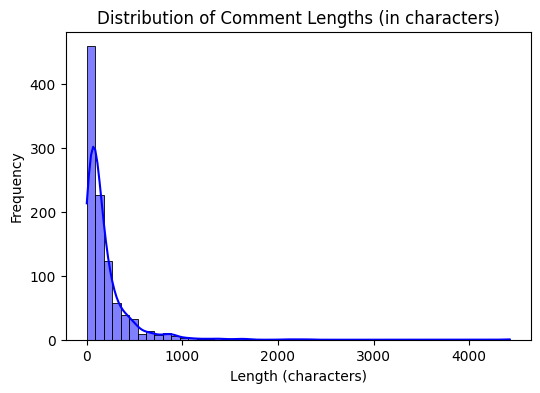

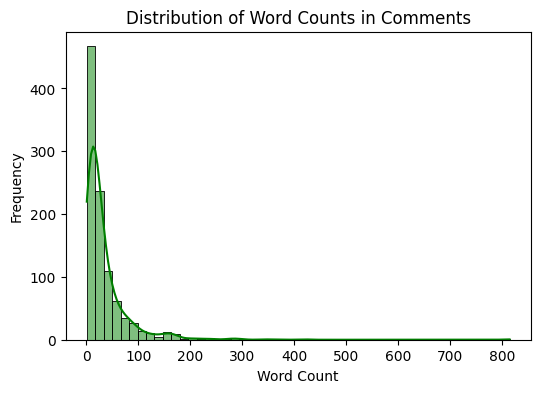

In [122]:
# Length analysis: Compute length in characters and words per comment, plot histograms

def analyze_comment_length(df):
    df['comment_length'] = df['text'].apply(lambda x: len(str(x)))    # How many characters in the comment
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split())) # How many words in the comment

    plt.figure(figsize=(6, 4))
    sns.histplot(df['comment_length'], bins=50, kde=True, color='blue')
    plt.title('Distribution of Comment Lengths (in characters)')
    plt.xlabel('Length (characters)')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(df['word_count'], bins=50, kde=True, color='green')
    plt.title('Distribution of Word Counts in Comments')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()

analyze_comment_length(df_clean_1)


In [123]:
df_clean_1[["text", "comment_length", "word_count"]]

# Check the column tex qhen word count is 0
df_clean_1[df_clean_1['word_count'] == 0][["text", "comment_length", "word_count"]] # There are none

# Check the column tex qhen word count is 1
df_clean_1[df_clean_1['word_count'] == 1][["text", "comment_length", "word_count"]] # Only 12 rows and all are valid comments
# Check the column tex qhen word count is 2
df_clean_1[df_clean_1['word_count'] == 2][["text", "comment_length", "word_count"]] # Only 22 rows and all are valid comments

# Check the top 10 comments with the most words
df_clean_1.nlargest(10, 'word_count')[['video_id', 'text', 'word_count']] # Results are valid comments

# Quick metric checks of word count and comment length
df_clean_1['word_count'].describe()     # mean: 33  | std: 49  (strongly deviated from the mean implying that it has strong biases or powerful outliers) |  min: 1  | 50%:  19  |  max: 815
df_clean_1['comment_length'].describe() # mean: 185 | std: 270 (strongly deviated from the mean implying that it has strong biases or powerful outliers) |  min:  3 |  50%: 101 |  max: 4,421

count    1000.000000
mean      185.554000
std       270.780777
min         3.000000
25%        47.000000
50%       101.000000
75%       217.000000
max      4421.000000
Name: comment_length, dtype: float64

In [124]:
# Checking for emojis in column 'text' since it might indicate sentiment and influence the model
EMOJI_PATTERN = re.compile(
    "[\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"   # symbols & pictographs
    "\U0001F680-\U0001F6FF"   # transport & map symbols
    "\U0001F1E0-\U0001F1FF"   # flags (iOS)
    "\U00002702-\U000027B0"   # Dingbats
    "\U000024C2-\U0001F251"   # Enclosed characters
    "]+", flags=re.UNICODE
)

# Checking for URLs in column 'text' since it might indicate sentiment and influence the model
URL_PATTERN = re.compile(r'https?://\S+|www\.\S+')

# Checking for special characters in column 'text' since it might indicate sentiment and influence the model
SPECIAL_CHAR_PATTERN = re.compile(r'[^a-zA-Z0-9\s.,?!]')

# Function to flag features in 'text'
def extract_text_features(df):
    df['has_emoji'] = df['text'].apply(lambda x: bool(EMOJI_PATTERN.search(str(x))))
    df['has_url'] = df['text'].apply(lambda x: bool(URL_PATTERN.search(str(x))))
    df['has_special_char'] = df['text'].apply(lambda x: bool(SPECIAL_CHAR_PATTERN.search(str(x))))
    return df

df_clean_1 = extract_text_features(df_clean_1)

print(df_clean_1[['has_emoji', 'has_url', 'has_special_char']].sum())

has_emoji            14
has_url              12
has_special_char    479
dtype: int64


In [125]:
# Changin display options for better readability
pd.set_option('display.max_colwidth', None)  # Show full comment text
pd.set_option('display.width', 200)          # Wider display width
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Avoid wrapping rows

# Checking the lines where the emojis, urls or special characters are present
def check_text_features(df, feature):
    print(f"\n🔍 Rows with `{feature}`:\n")
    selected = df[df[feature]][['text', 'comment_length', 'word_count']].head(10)
    print(selected.to_string(index=False))  # Pretty print without truncation

check_text_features(df_clean_1, 'has_emoji')
check_text_features(df_clean_1, 'has_url')
check_text_features(df_clean_1, 'has_special_char')


🔍 Rows with `has_emoji`:

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


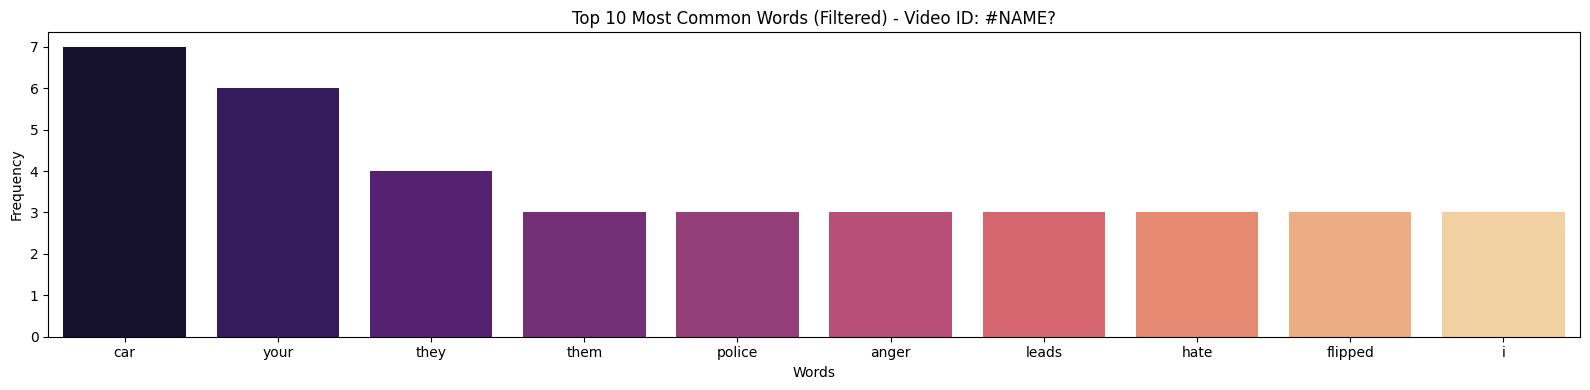

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


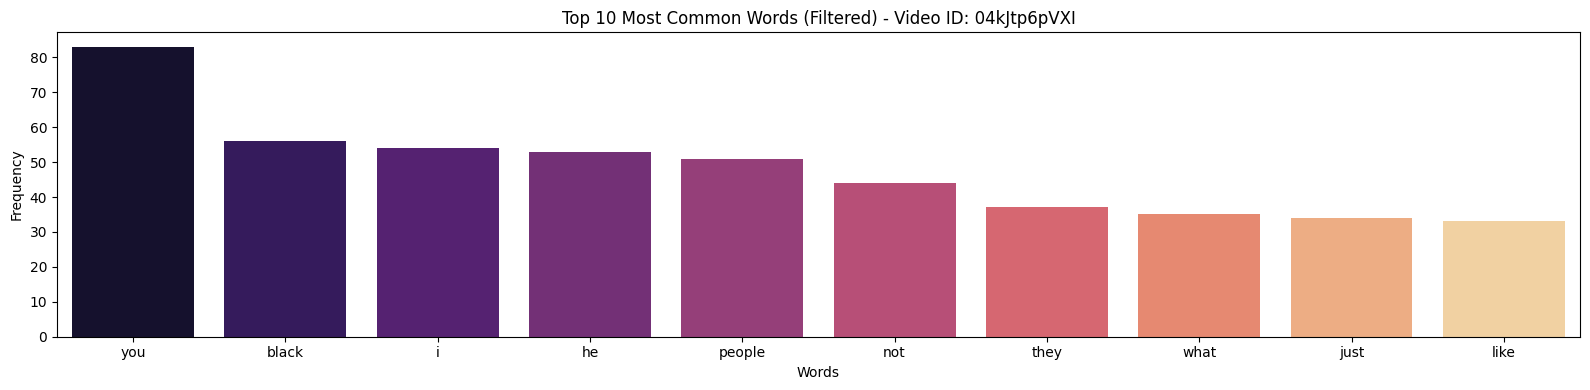

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


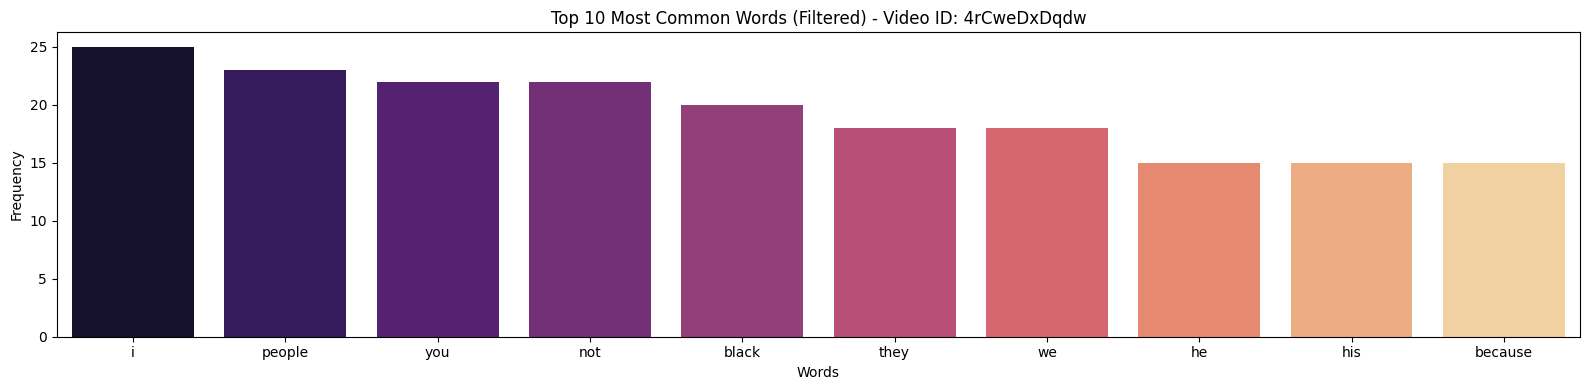

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


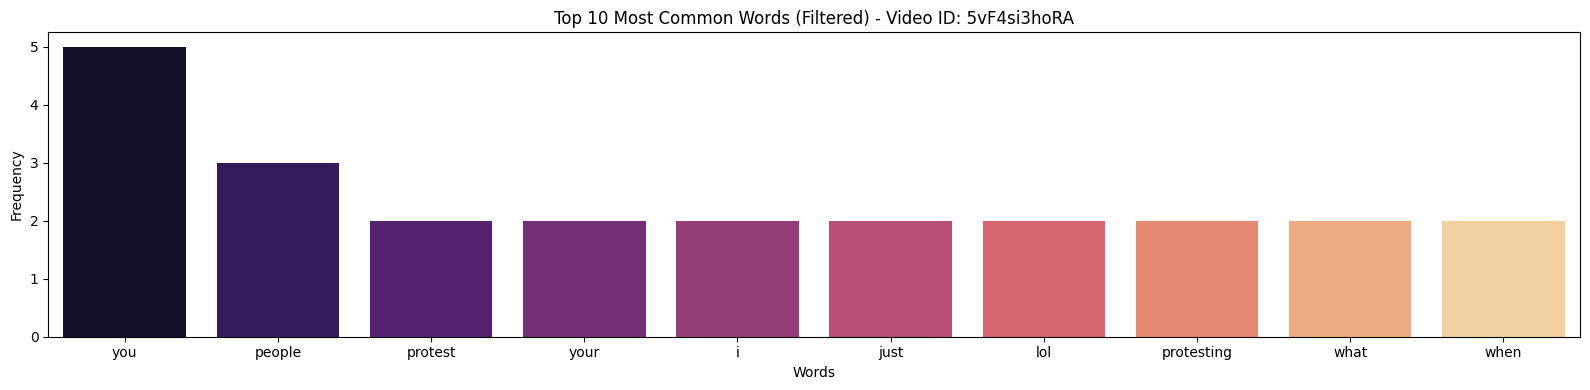

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


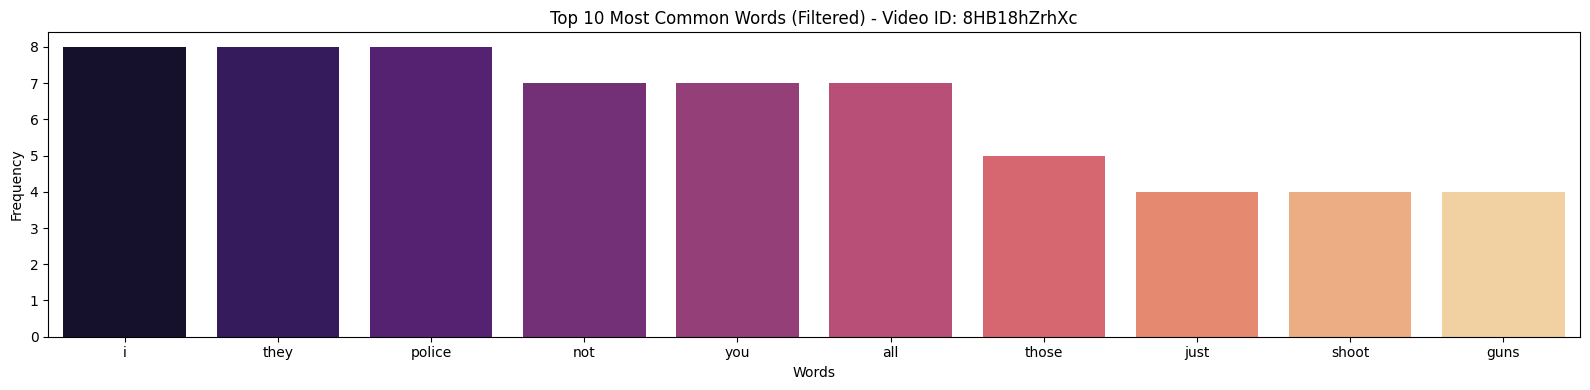

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


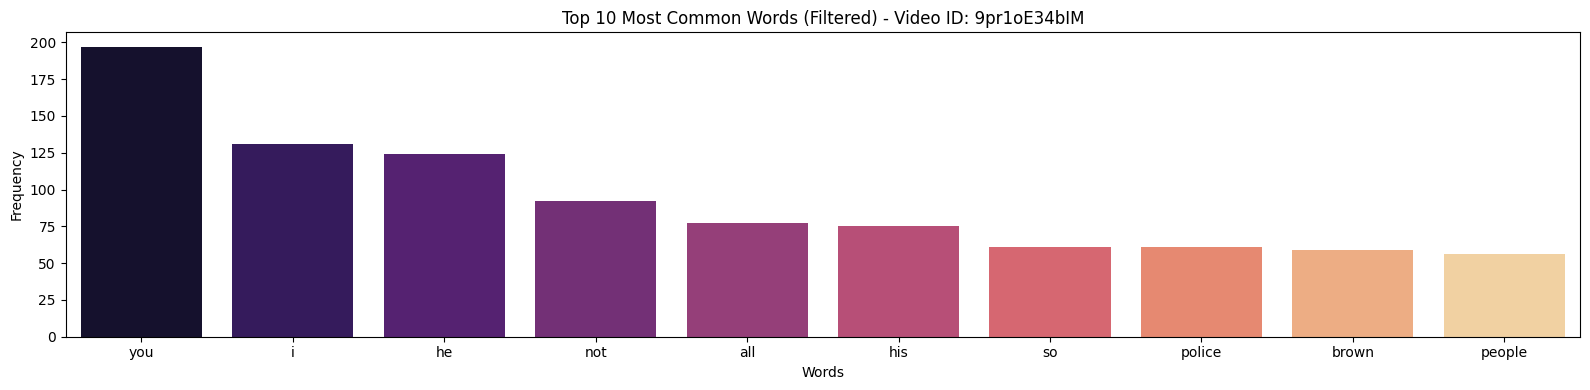

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


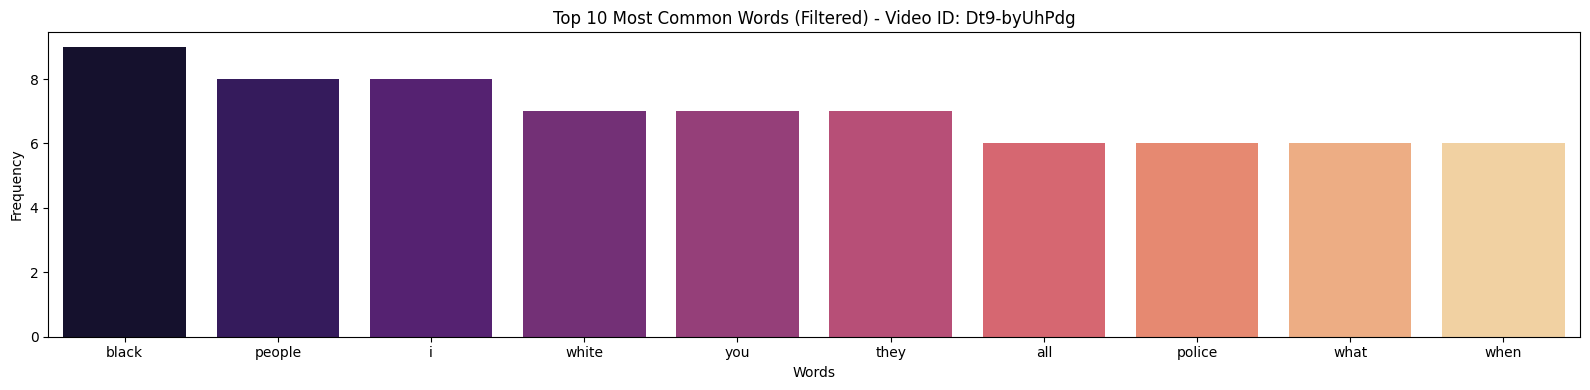

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


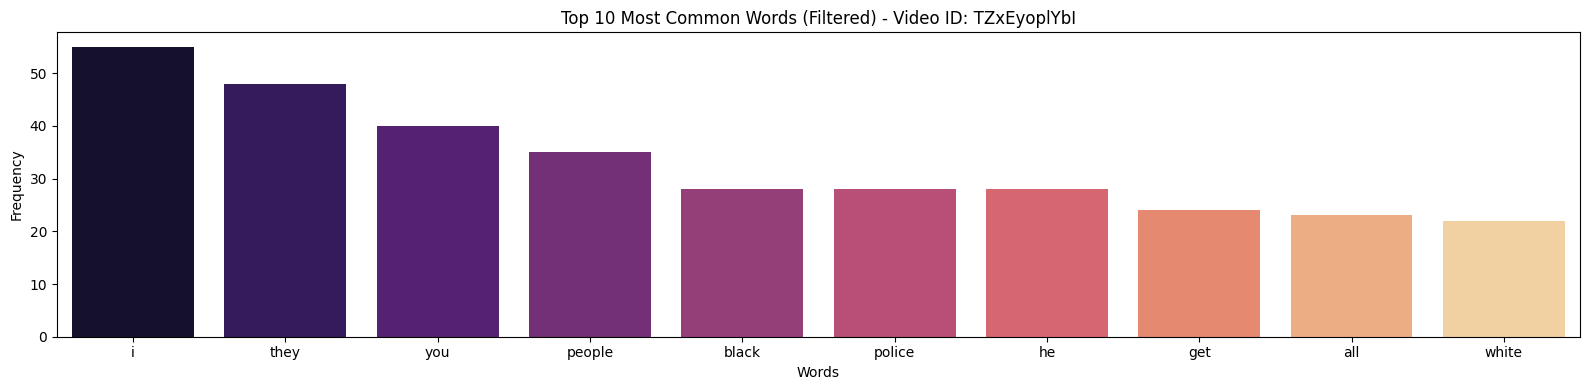

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


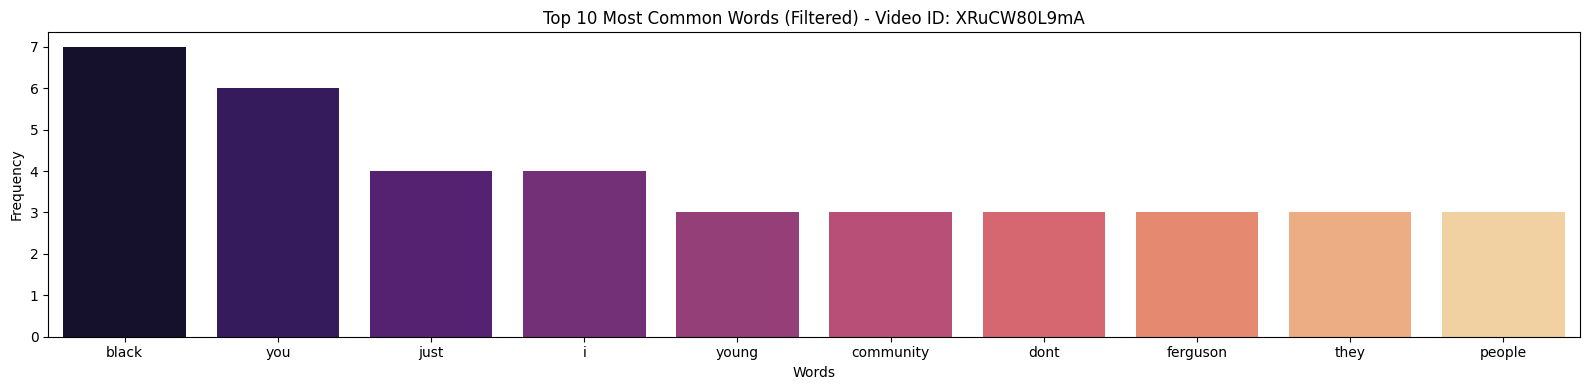

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


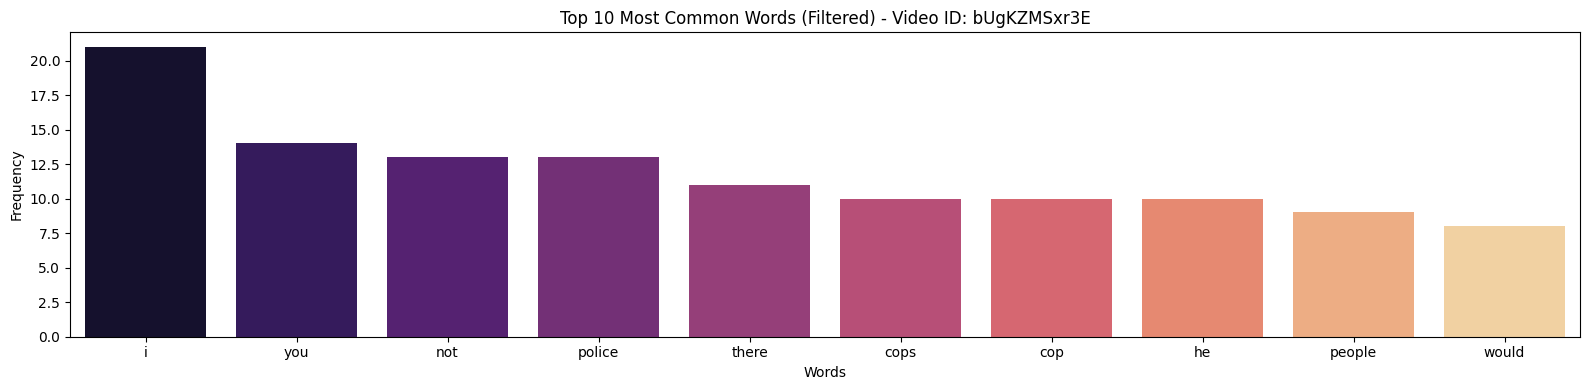

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


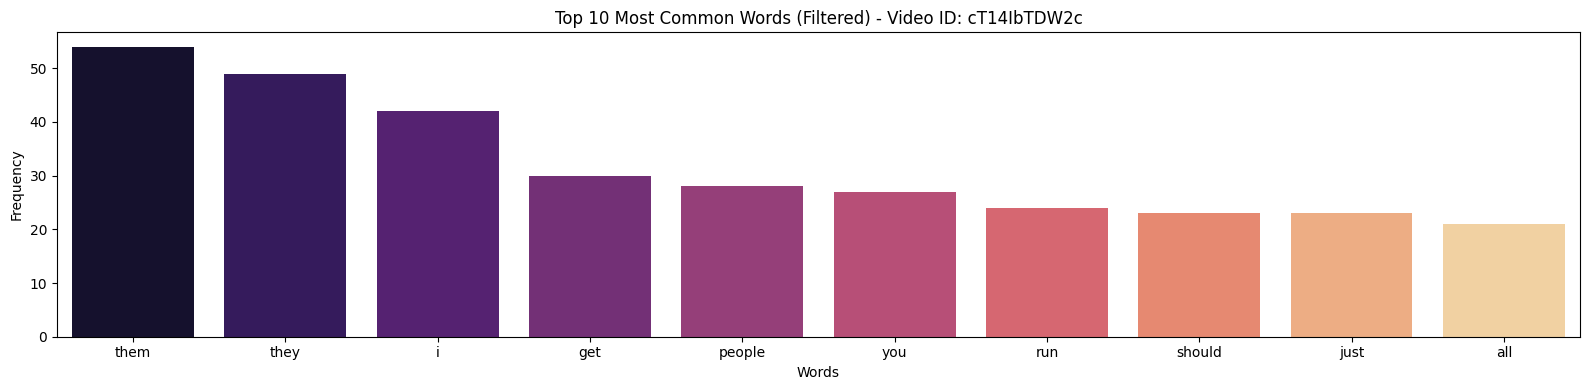

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


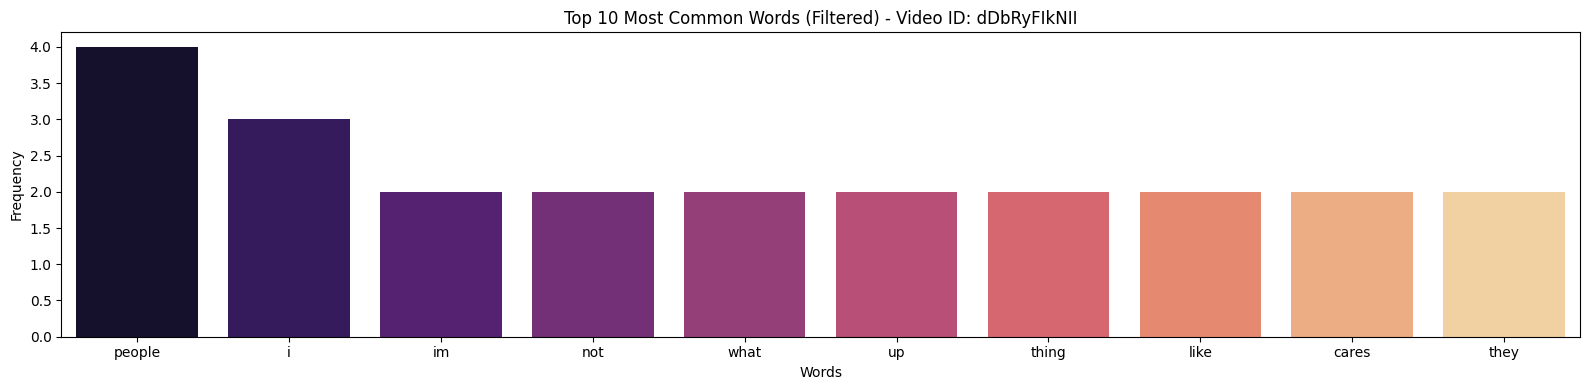

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\2858450977.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


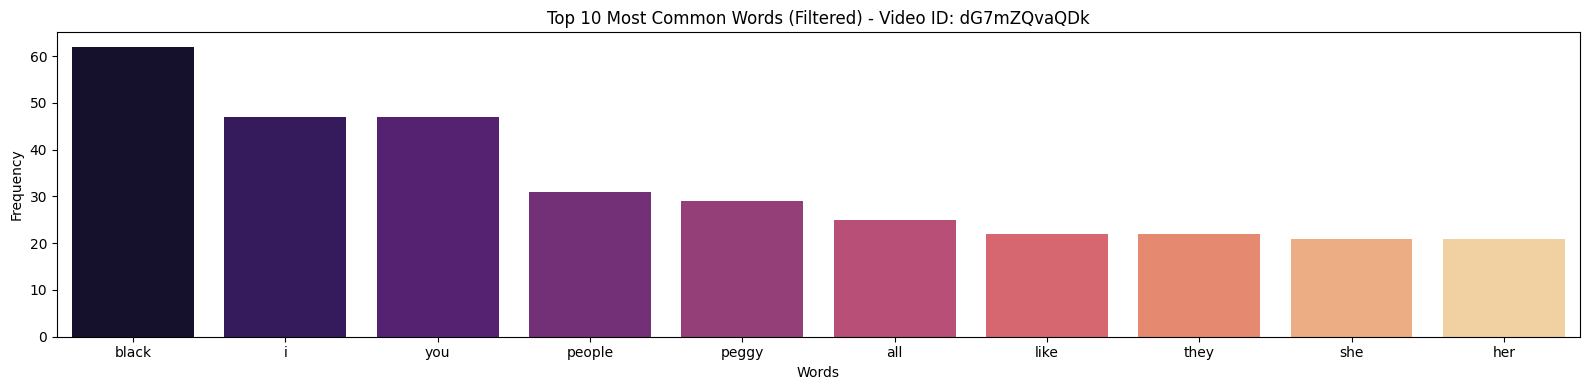

In [126]:
# Most frequent words in column 'text' by video_id column
    # The most frequent words are stopwords so, it will be cleaned of stopwords and punctuation

stopwords = ["to", "in", "on", "at", "by", "with", "for", "from", "into", "about", "over", "after", "before","under", "above", "around", "the", "a", "an", "and", "or", "but", 
             "of", "if", "is", "are", "was","were", "that", "this", "it", "as", "be", "has", "had", "have"]

# Preprocessing function to clean text
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Function to analyze most common words per video
def most_common_words_per_video(df, text_col='text', group_col='video_id', top_n=10):
    grouped = df.groupby(group_col)[text_col].apply(lambda x: ' '.join(x)).reset_index()
    grouped[text_col] = grouped[text_col].apply(clean_text)

    def count_filtered_words(text):
        return Counter(word for word in text.split() if word not in stopwords)

    grouped['word_counts'] = grouped[text_col].apply(count_filtered_words)

    for idx, row in grouped.iterrows():
        video = row[group_col]
        word_counter = row['word_counts']
        most_common = word_counter.most_common(top_n)

        words, counts = zip(*most_common) if most_common else ([], [])
        plt.figure(figsize=(16, 4))
        sns.barplot(x=list(words), y=list(counts), palette="magma")
        plt.title(f"Top {top_n} Most Common Words (Filtered) - Video ID: {video}")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

most_common_words_per_video(df_clean_1, top_n=10)


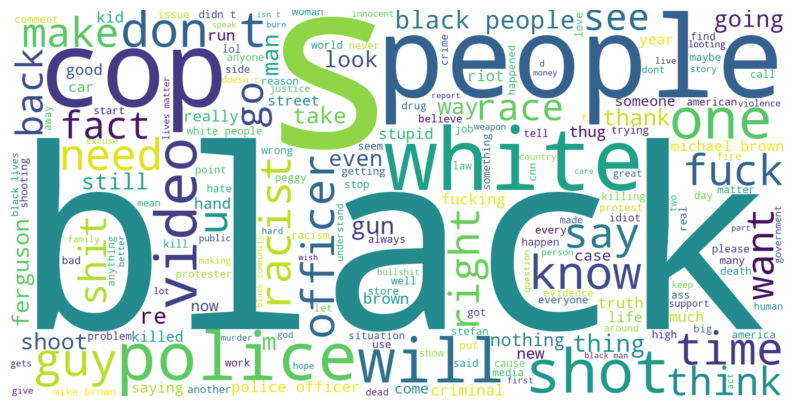

In [127]:
# Map of words of most frequent words in column text without stopwords and punctuation

# Combine basic stopwords with some common filler words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['the', 'to', 'a', 'and', 'of', 'in', 'that', 'is', 'for', 'on', 'with', 'this', 'it', 'at'])

# Remove punctuation and lowercase text
text_data = df_clean_1['text'].astype(str).str.lower().str.replace(f"[{string.punctuation}]", " ", regex=True)

# Join all text
full_text = " ".join(text_data)

# Generate word cloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='viridis',
    max_words=200
).generate(full_text)

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\3288462129.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngram_counts.values, y=ngram_counts.index, palette="viridis")


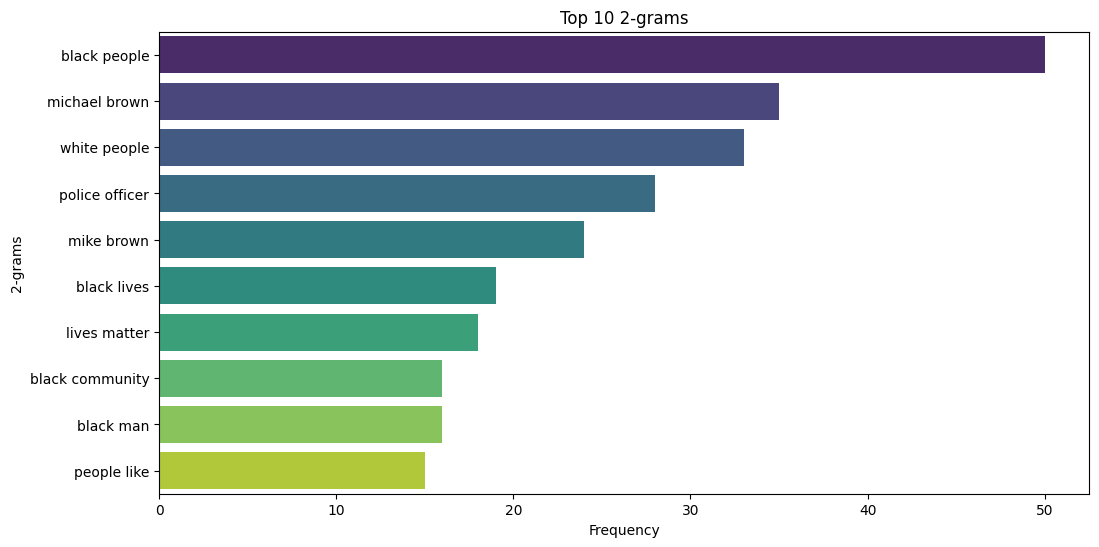

C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\3288462129.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngram_counts.values, y=ngram_counts.index, palette="viridis")


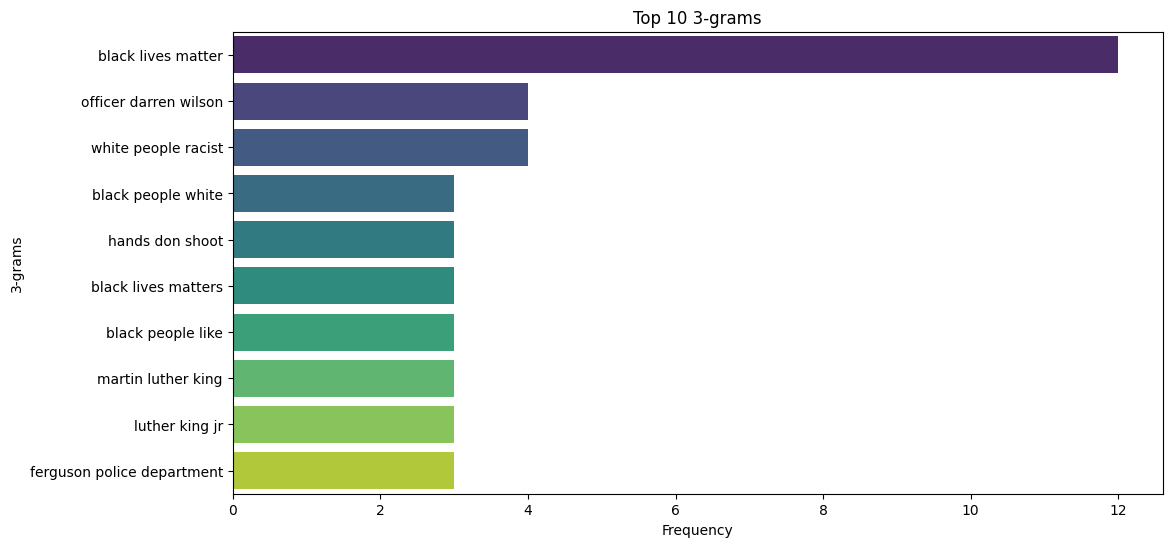

In [128]:
# Simple n-gram extraction (bigrams or trigrams) to get a feel of common phrases

def extract_ngrams(df, text_col='text', n=2, top_n=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(df[text_col].astype(str))
    ngrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Sum across all rows to get total counts
    ngram_counts = ngrams.sum().sort_values(ascending=False).head(top_n)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=ngram_counts.values, y=ngram_counts.index, palette="viridis")
    plt.title(f"Top {top_n} {n}-grams")
    plt.xlabel("Frequency")
    plt.ylabel(f"{n}-grams")
    plt.show()
extract_ngrams(df_clean_1, n=2, top_n=10)  # Bigrams
extract_ngrams(df_clean_1, n=3, top_n=10)  # Trigrams

In [ ]:
# Checking if there's self promotion in comments since this is a common issue in YouTube comments
self_promo_keywords = ['check out my', 'subscribe to', 'follow me', 'visit my', 'link in bio','watch my', 'support my', 'my channel', 'my content', 'please subscribe',
                       'giveaway on my', 'join my', 'don’t forget to follow']

def is_self_promotional(text):
    text = text.lower()
    return any(phrase in text for phrase in self_promo_keywords)

df_clean_1['is_self_promotional'] = df_clean_1['text'].apply(is_self_promotional)

df_clean_1[df_clean_1['is_self_promotional']][['text']].head() # Apparently there are no self promotional comments, all the comments are legitimate

,text


#### <span style="color:#f3a006"> [`video_id`] Video Distribution Analysis </span> 

Most popular videos by comment count:
video_id
9pr1oE34bIM    274
04kJtp6pVXI    172
cT14IbTDW2c    146
dG7mZQvaQDk    112
TZxEyoplYbI    104
bUgKZMSxr3E     39
8HB18hZrhXc     38
4rCweDxDqdw     37
Dt9-byUhPdg     34
#NAME?          16
dDbRyFIkNII     10
XRuCW80L9mA     10
5vF4si3hoRA      8
Name: count, dtype: int64


C:\Users\yaelp\AppData\Local\Temp\ipykernel_28476\349551735.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=video_counts.index, y=video_counts.values, palette='viridis')


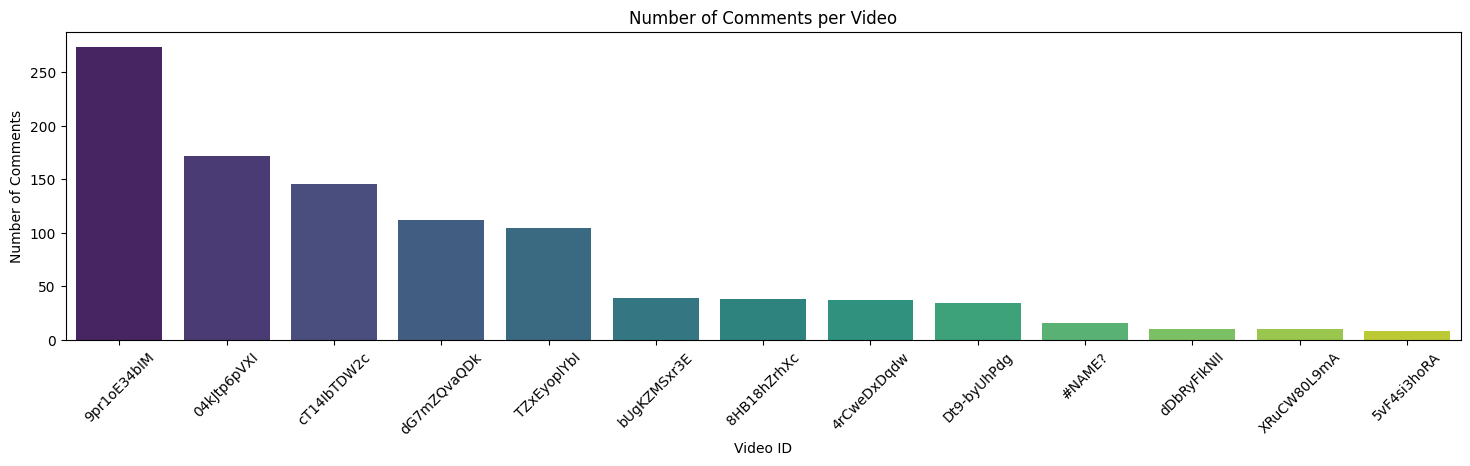

In [129]:
# Check the top 10 video_id's texts with largest number of word_count
df_clean_1.nlargest(10, 'word_count')[['video_id', 'text', 'word_count']].groupby('video_id').agg({'text': 'first', 'word_count': 'sum'}) # This checking was useless

# Check the video_id's in ascendant order with the most qty of comment_id (since comment_id are all unique vlues) Le'ts check which are the most popular videos or with more comments
def most_popular_videos(df, top_n=13):
    popular_videos = df['video_id'].value_counts().head(top_n)
    print("Most popular videos by comment count:")
    print(popular_videos)   
most_popular_videos(df_clean_1, top_n=13) # There are only 13 unique videos in the dataset

# Check in one graphic the number of comments per video_id
def plot_comments_per_video(df):
    video_counts = df['video_id'].value_counts()
    plt.figure(figsize=(18, 4))
    sns.barplot(x=video_counts.index, y=video_counts.values, palette='viridis')
    plt.title('Number of Comments per Video')
    plt.xlabel('Video ID')
    plt.ylabel('Number of Comments')
    plt.xticks(rotation=45)
    plt.show()
plot_comments_per_video(df_clean_1)

In [130]:
# Check the comments of the video id called "#NAME?"
# I wanted to check it because of the name of the video_id but all the comments belong to the same video (police car)
df_clean_1[df_clean_1['video_id'] == '#NAME?'][['video_id', 'text', 'comment_length', 'word_count']]

,video_id,text,comment_length,word_count
870,#NAME?,Now your tax dollars will get them a spanking new cop car 😔,60,13
871,#NAME?,That police car was purposefully left for them to destroy and get their anger out instead of on more businesses. The cost for the destruction of that car will be passed off to state taxpayers.,192,35
872,#NAME?,95% of the policing problem being protested here is caused by black criminals. Let's not forget to blame and address the elephant in the room.,143,25
873,#NAME?,"Peace needs to be found on both sides. Be stubborn, be relentless, be peaceful. Don't go to work, sit on the steps of those in power for days and chant your concerns! ........................ “Fear is the path to the dark side. Fear leads to anger. Anger leads to hate. Hate leads to suffering.”- Yoda.............................. :) <3",339,56
874,#NAME?,For an inanimate object that police car was very resilient to getting completely flipped over and set on fire.,110,19
875,#NAME?,I hate basterds like this but I would have been funny if they tried pushing more and it flipped back on top of a few of them. #Hacopcarcanstillfightback,153,28
876,#NAME?,Ferguson 2014: Protesters Flip Police Car | The New York Times,62,11
877,#NAME?,I wish the car flipped over and crushed the rioters,51,10
878,#NAME?,It's only Ameland!,18,3
879,#NAME?,The cops need to look at the video and start arresting these people.,69,13


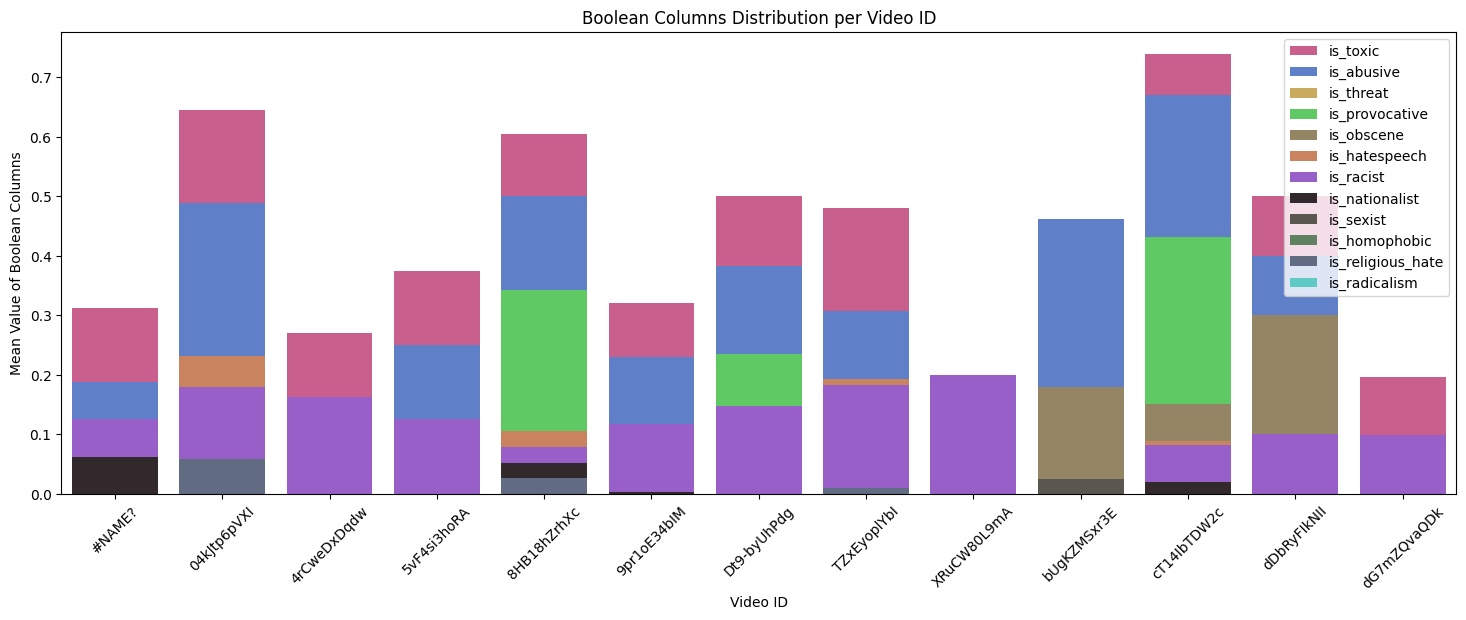

In [131]:
# Checking the booleans columns distribution per video_id
def plot_boolean_distribution_per_video(df, bool_columns):
    video_groups = df.groupby('video_id')[bool_columns].mean().reset_index()

    palette = ['#DB4D89', '#4D79DB', '#DBB14D', '#4DDB53', '#9C895D', '#DB7E4D', '#9B4DDB', '#33282D', '#5C584E','#5C865E','#5C6986', '#4DDBD4',]

    plt.figure(figsize=(18, 6))
    # for col in bool_columns:
    #     sns.barplot(x='video_id', y=col, data=video_groups, label=col)
    for idx, col in enumerate(bool_columns):
        sns.barplot(
            x='video_id',
            y=col,
            data=video_groups,
            label=col,
            color=palette[idx % len(palette)],
        )

    
    plt.title('Boolean Columns Distribution per Video ID')
    plt.xlabel('Video ID')
    plt.ylabel('Mean Value of Boolean Columns')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
plot_boolean_distribution_per_video(df_clean_1, bool_cols)

In [132]:
# Columns to drop at the end because they were only usefull for the eda: comment_length ,  word_count